In [15]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib_venn import venn2
import matplotlib.gridspec as gridspec

In [2]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')
sub = pd.read_csv('data/sample_submission.csv')
print(train.shape)
print(test.shape)
print(sub.shape)

(6079, 41)
(476, 11)
(476, 31)


In [3]:
train.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,0,What am I losing when using extension tubes in...,After playing around with macro photography on...,ysap,https://photo.stackexchange.com/users/1024,"I just got extension tubes, so here's the skin...",rfusca,https://photo.stackexchange.com/users/1917,http://photo.stackexchange.com/questions/9169/...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,0.000000,1.000000
1,1,What is the distinction between a city and a s...,I am trying to understand what kinds of places...,russellpierce,https://rpg.stackexchange.com/users/8774,It might be helpful to look into the definitio...,Erik Schmidt,https://rpg.stackexchange.com/users/1871,http://rpg.stackexchange.com/questions/47820/w...,CULTURE,...,0.888889,0.888889,0.555556,0.888889,0.888889,0.666667,0.0,0.000000,0.666667,0.888889
2,2,Maximum protusion length for through-hole comp...,I'm working on a PCB that has through-hole com...,Joe Baker,https://electronics.stackexchange.com/users/10157,Do you even need grooves? We make several pro...,Dwayne Reid,https://electronics.stackexchange.com/users/64754,http://electronics.stackexchange.com/questions...,SCIENCE,...,0.777778,0.777778,0.555556,1.000000,1.000000,0.666667,0.0,0.333333,1.000000,0.888889
3,3,Can an affidavit be used in Beit Din?,"An affidavit, from what i understand, is basic...",Scimonster,https://judaism.stackexchange.com/users/5151,"Sending an ""affidavit"" it is a dispute between...",Y e z,https://judaism.stackexchange.com/users/4794,http://judaism.stackexchange.com/questions/551...,CULTURE,...,0.888889,0.833333,0.333333,0.833333,1.000000,0.800000,0.0,0.000000,1.000000,1.000000
4,5,How do you make a binary image in Photoshop?,I am trying to make a binary image. I want mor...,leigero,https://graphicdesign.stackexchange.com/users/...,Check out Image Trace in Adobe Illustrator. \n...,q2ra,https://graphicdesign.stackexchange.com/users/...,http://graphicdesign.stackexchange.com/questio...,LIFE_ARTS,...,1.000000,1.000000,0.666667,1.000000,1.000000,0.800000,1.0,0.000000,1.000000,1.000000


In [4]:
test.head()

,qa_id,question_title,question_body,question_user_name,question_user_page,answer,answer_user_name,answer_user_page,url,category,host
0,39,Will leaving corpses lying around upset my pri...,I see questions/information online about how t...,Dylan,https://gaming.stackexchange.com/users/64471,There is no consequence for leaving corpses an...,Nelson868,https://gaming.stackexchange.com/users/97324,http://gaming.stackexchange.com/questions/1979...,CULTURE,gaming.stackexchange.com
1,46,Url link to feature image in the portfolio,I am new to Wordpress. i have issue with Featu...,Anu,https://wordpress.stackexchange.com/users/72927,I think it is possible with custom fields.\n\n...,Irina,https://wordpress.stackexchange.com/users/27233,http://wordpress.stackexchange.com/questions/1...,TECHNOLOGY,wordpress.stackexchange.com
2,70,"Is accuracy, recoil or bullet spread affected ...","To experiment I started a bot game, toggled in...",Konsta,https://gaming.stackexchange.com/users/37545,You do not have armour in the screenshots. Thi...,Damon Smithies,https://gaming.stackexchange.com/users/70641,http://gaming.stackexchange.com/questions/2154...,CULTURE,gaming.stackexchange.com
3,132,Suddenly got an I/O error from my external HDD,I have used my Raspberry Pi as a torrent-serve...,robbannn,https://raspberrypi.stackexchange.com/users/17341,Your Western Digital hard drive is disappearin...,HeatfanJohn,https://raspberrypi.stackexchange.com/users/1311,http://raspberrypi.stackexchange.com/questions...,TECHNOLOGY,raspberrypi.stackexchange.com
4,200,Passenger Name - Flight Booking Passenger only...,I have bought Delhi-London return flights for ...,Amit,https://travel.stackexchange.com/users/29089,I called two persons who work for Saudia (tick...,Nean Der Thal,https://travel.stackexchange.com/users/10051,http://travel.stackexchange.com/questions/4704...,CULTURE,travel.stackexchange.com


In [5]:
sub.head()

,qa_id,question_asker_intent_understanding,question_body_critical,question_conversational,question_expect_short_answer,question_fact_seeking,question_has_commonly_accepted_answer,question_interestingness_others,question_interestingness_self,question_multi_intent,...,question_well_written,answer_helpful,answer_level_of_information,answer_plausible,answer_relevance,answer_satisfaction,answer_type_instructions,answer_type_procedure,answer_type_reason_explanation,answer_well_written
0,39,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,...,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308,0.00308
1,46,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,...,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448,0.00448
2,70,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,...,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673,0.00673
3,132,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,...,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401,0.01401
4,200,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,...,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074,0.02074


In [6]:
targer_cols = sub.columns
print(targer_cols)
print(len(targer_cols))

Index(['qa_id', 'question_asker_intent_understanding',
       'question_body_critical', 'question_conversational',
       'question_expect_short_answer', 'question_fact_seeking',
       'question_has_commonly_accepted_answer',
       'question_interestingness_others', 'question_interestingness_self',
       'question_multi_intent', 'question_not_really_a_question',
       'question_opinion_seeking', 'question_type_choice',
       'question_type_compare', 'question_type_consequence',
       'question_type_definition', 'question_type_entity',
       'question_type_instructions', 'question_type_procedure',
       'question_type_reason_explanation', 'question_type_spelling',
       'question_well_written', 'answer_helpful',
       'answer_level_of_information', 'answer_plausible', 'answer_relevance',
       'answer_satisfaction', 'answer_type_instructions',
       'answer_type_procedure', 'answer_type_reason_explanation',
       'answer_well_written'],
      dtype='object')
31


In [7]:
def resumetable(df):
    print(f"Dataset Shape: {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns=['dtypes'])
    summary = summary.reset_index()
    summary['Name'] = summary['index']
    summary = summary[['Name', 'dtypes']]
    summary['Missing'] = df.isnull().sum().values
    summary['Uniques'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values

    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, 'Entropy'] = round(stats.entropy(df[name].value_counts(normalize=True), base=2), 2) 

    return summary

In [8]:
resumetable(train)

Dataset Shape: (6079, 41)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,qa_id,int64,0,6079,0,1,2,12.57
1,question_title,object,0,3583,What am I losing when using extension tubes in...,What is the distinction between a city and a s...,Maximum protusion length for through-hole comp...,11.64
2,question_body,object,0,3583,After playing around with macro photography on...,I am trying to understand what kinds of places...,I'm working on a PCB that has through-hole com...,11.64
3,question_user_name,object,0,3215,ysap,russellpierce,Joe Baker,11.42
4,question_user_page,object,0,3422,https://photo.stackexchange.com/users/1024,https://rpg.stackexchange.com/users/8774,https://electronics.stackexchange.com/users/10157,11.56
5,answer,object,0,6079,"I just got extension tubes, so here's the skin...",It might be helpful to look into the definitio...,Do you even need grooves? We make several pro...,12.57
6,answer_user_name,object,0,4114,rfusca,Erik Schmidt,Dwayne Reid,11.68
7,answer_user_page,object,0,4430,https://photo.stackexchange.com/users/1917,https://rpg.stackexchange.com/users/1871,https://electronics.stackexchange.com/users/64754,11.85
8,url,object,0,3583,http://photo.stackexchange.com/questions/9169/...,http://rpg.stackexchange.com/questions/47820/w...,http://electronics.stackexchange.com/questions...,11.64
9,category,object,0,5,LIFE_ARTS,CULTURE,SCIENCE,2.14


In [9]:
resumetable(test)

Dataset Shape: (476, 11)


,Name,dtypes,Missing,Uniques,First Value,Second Value,Third Value,Entropy
0,qa_id,int64,0,476,39,46,70,8.89
1,question_title,object,0,476,Will leaving corpses lying around upset my pri...,Url link to feature image in the portfolio,"Is accuracy, recoil or bullet spread affected ...",8.89
2,question_body,object,0,476,I see questions/information online about how t...,I am new to Wordpress. i have issue with Featu...,"To experiment I started a bot game, toggled in...",8.89
3,question_user_name,object,0,467,Dylan,Anu,Konsta,8.85
4,question_user_page,object,0,474,https://gaming.stackexchange.com/users/64471,https://wordpress.stackexchange.com/users/72927,https://gaming.stackexchange.com/users/37545,8.89
5,answer,object,0,476,There is no consequence for leaving corpses an...,I think it is possible with custom fields.\n\n...,You do not have armour in the screenshots. Thi...,8.89
6,answer_user_name,object,0,363,Nelson868,Irina,Damon Smithies,8.38
7,answer_user_page,object,0,367,https://gaming.stackexchange.com/users/97324,https://wordpress.stackexchange.com/users/27233,https://gaming.stackexchange.com/users/70641,8.41
8,url,object,0,476,http://gaming.stackexchange.com/questions/1979...,http://wordpress.stackexchange.com/questions/1...,http://gaming.stackexchange.com/questions/2154...,8.89
9,category,object,0,5,CULTURE,TECHNOLOGY,CULTURE,2.09


In [10]:
for i in range(len(train)):
    train.loc[i, 'host_cat'] = train.host.str.split('.')[i][0]
train.drop('host', axis=1, inplace=True)

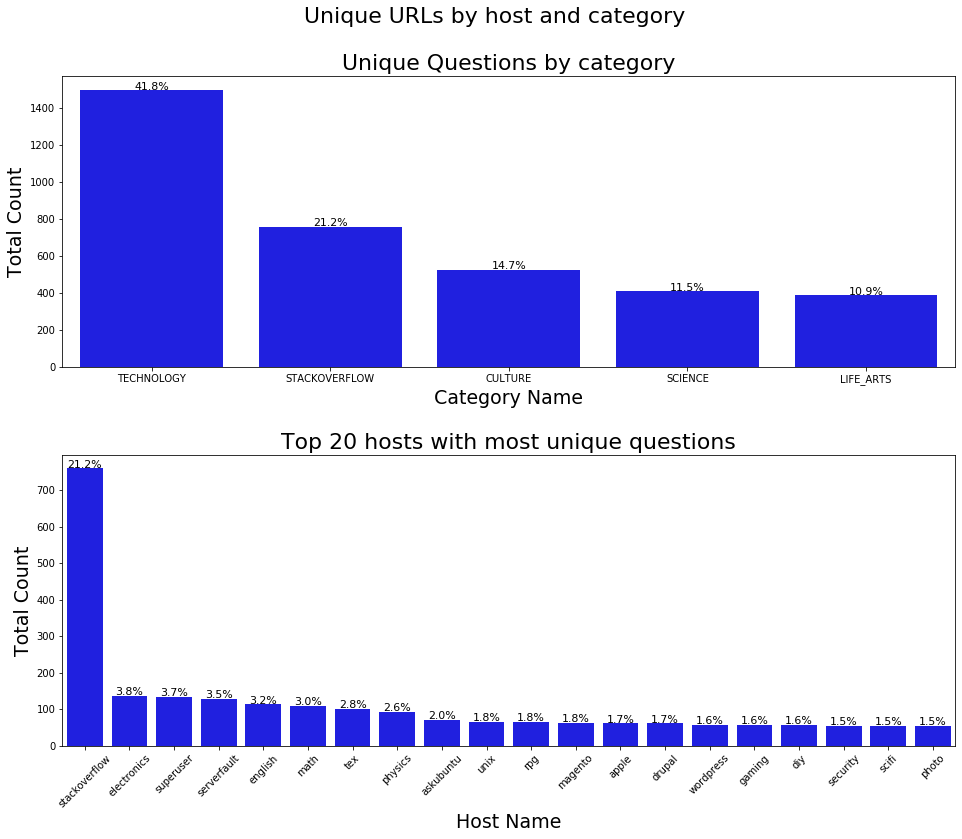

In [11]:
host = train.groupby(['host_cat'])['url'].nunique().sort_values(ascending=False)
category = train.groupby(['category'])['url'].nunique().sort_values(ascending=False)

plt.figure(figsize=(16, 12))
plt.suptitle('Unique URLs by host and category', size=22)

plt.subplot(211)
g0 = sns.barplot(x=category.index, y=category.values, color='blue')
g0.set_title('Unique Questions by category', fontsize=22)
g0.set_xlabel('Category Name', fontsize=19)
g0.set_ylabel('Total Count', fontsize=19)

for p in g0.patches:
    height = p.get_height()
    g0.text(p.get_x() + p.get_width()/2.,
           height + 3,
           '{:1.1f}%'.format(height/category.sum()*100),
           ha='center', fontsize=11)
    
plt.subplot(212)
g1 = sns.barplot(x=host[:20].index, y=host[:20].values, color='blue')
g1.set_title('Top 20 hosts with most unique questions', fontsize=22)
g1.set_xlabel('Host Name', fontsize=19)
g1.set_ylabel('Total Count', fontsize=19)

g1.set_xticklabels(g1.get_xticklabels(), rotation=45)
for p in g1.patches:
    height = p.get_height()
    g1.text(p.get_x() + p.get_width()/2., 
           height + 3,
           '{:1.1f}%'.format(height/category.sum()*100),
           ha='center', fontsize=11)
    
plt.subplots_adjust(hspace = 0.3, top = .90)
plt.show()

In [12]:
print(f"Total Unique Users in 'Questions User Name': {train['question_user_name'].nunique()}")
print(f"Total Unique Users in 'Answer User Name': {train['answer_user_name'].nunique()}")

Total Unique Users in 'Questions User Name': 3215
Total Unique Users in 'Answer User Name': 4114


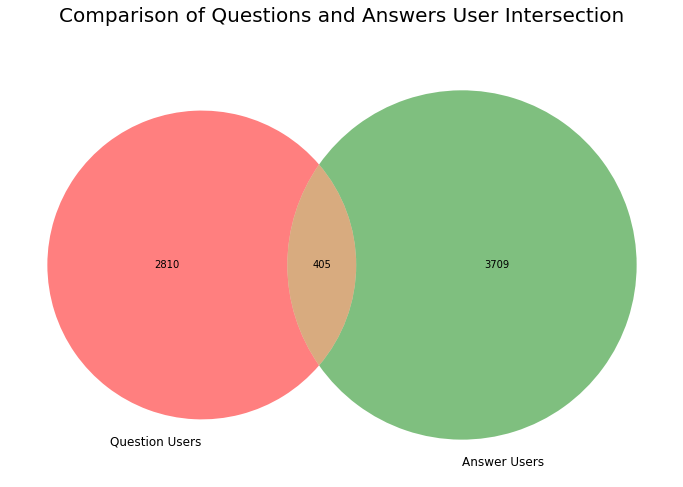

In [14]:
plt.figure(figsize=(12, 8))

venn2([set(train['question_user_name'].value_counts(dropna=False).index),
          set(train['answer_user_name'].value_counts(dropna=False).index)],
         set_labels=('Question Users', 'Answer Users'), alpha=.5)
plt.title('Comparison of Questions and Answers User Intersection\n', fontsize=20)

plt.show()

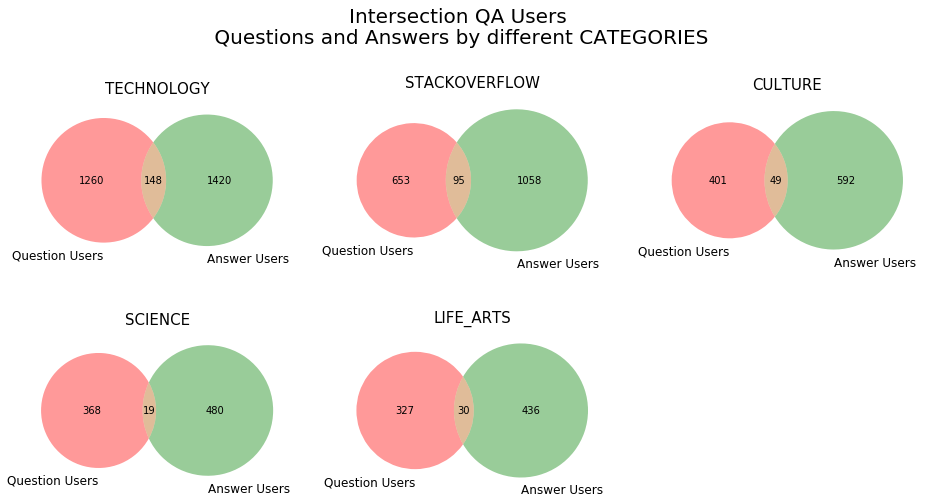

In [19]:
grid = gridspec.GridSpec(3, 3)
plt.figure(figsize=(16, 3*4))

plt.suptitle('Intersection QA Users\n Questions and Answers by different CATEGORIES', size=20)

for n, col in enumerate(train['category'].value_counts().index):
    ax = plt.subplot(grid[n])
    venn2([set(train[train.category == col]['question_user_name'].value_counts().index),
          set(train[train.category == col]['answer_user_name'].value_counts().index)],
         set_labels=('Question Users', 'Answer Users'))
    ax.set_title(str(col), fontsize=15)
    
plt.subplots_adjust(top=.9, hspace=.1)
plt.show()

In [ ]:
grid = gridspec.GridSpec(5, 3)
plt.figure(figsize(16, 4.5*4))

plt.suptitle('Intersection QA Users - TOP 15 \nQuestions and Answers by different hosts', size=20)
top_hosts = train['host_cat'].value_counts()[:15].index

for n, col in enumerate(top_hosts):
    ax = plt.subplot(grid[n])
    venn2([set(train[train.category == col]['question_user_name'].value_counts().index),
      set(train[train.category == col]['answer_user_name'].value_counts().index)],
     set_labels=('Question Users', 'Answer Users'))
    ax.set_title(str(col), fontsize=15)
    
plt.subplots_adjust(top=.9, hspace=.1)
plt.show()